In [1]:
import pandas as pd
import numpy as np

path = "//home/font/Data/MM/neepu/"
filename_sanya = '三亚.csv'
filename_haikou = '海口.csv'
data_sanya = pd.read_csv((path+filename_sanya),index_col='Time')
data_haikou = pd.read_csv((path+filename_haikou),index_col='Time')
# mmercial housing sold = CHS,Consumer price index = CPI,Gross production = GP,housing price =HP
columns = ['Total_pop','PCDI(city)','PCDI(countryside)','CHS','Total_inv','CPI','GP','Balance','HP']

print(data_sanya.columns)
data_sanya.columns =columns
data_sanya.index = pd.to_datetime(data_sanya.index)
data_sanya = np.log(data_sanya)
data_sanya

Index(['年末人口(万)', '人均可支配收入(城镇)', '人均可支配收入(农村)', '商品房销售面积(平方米)',
       '房地产开发投资总额(万元)', '居民消费价格指数', '生产总值(亿元)', '储蓄存款余额(亿元)', '商品房价格(万元)'],
      dtype='object')


,Total_pop,PCDI(city),PCDI(countryside),CHS,Total_inv,CPI,GP,Balance,HP
Time,,,,,,,,,
2013-01-01,4.279440,10.055994,9.088399,14.392227,14.684512,4.638605,5.902333,14.993620,9.891099
2014-01-01,4.293195,10.120009,9.218705,14.406474,14.923162,4.636669,5.997099,15.054644,9.843614
2015-01-01,4.306629,10.198393,9.331230,13.806739,15.150553,4.633758,6.077229,15.113878,9.788105
2016-01-01,4.316020,10.267505,9.411484,13.865710,15.355910,4.613138,6.164493,15.258060,9.826184
2017-01-01,4.323205,10.345060,9.500020,14.162810,15.226606,4.630838,6.271461,15.298032,10.203796


In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
from numpy import *
def GRA_ONE(DataFrame,m=0):
    gray= DataFrame
    #读取为df格式
    gray=(gray - gray.min()) / (gray.max() - gray.min())
    #标准化
    std=gray.iloc[:,m]#为标准要素
    ce=gray.iloc[:,0:]#为比较要素
    n=ce.shape[0]
    m=ce.shape[1]#计算行列

    #与标准要素比较，相减
    a=zeros([m,n])
    for i in range(m):
        for j in range(n):
            a[i,j]=abs(ce.iloc[j,i]-std[j])

    #取出矩阵中最大值与最小值
    c=amax(a)
    d=amin(a)

    #计算值
    result=zeros([m,n])
    for i in range(m):
        for j in range(n):
            result[i,j]=(d+0.5*c)/(a[i,j]+0.5*c)

    #求均值，得到灰色关联值
    result2=zeros(m)
    for i in range(m):
            result2[i]=mean(result[i,:])
    RT=pd.DataFrame(result2)
    return RT

def GRA(DataFrame):
    list_columns = [str(s) for s in range(len(data_sanya.columns)) if s not in [None]]
    df_local = pd.DataFrame(columns=list_columns)
    print(df_local)
    for i in range(len(DataFrame.columns)):
        df_local.iloc[:,i] = GRA_ONE(DataFrame,m=i)[0]
    return df_local

In [3]:
data_sanya_gra = GRA(data_sanya)
data_sanya_gra.to_csv(path+"GRA.csv")
data_sanya_gra

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Index: []


,0,1,2,3,4,5,6,7,8
0,1.000000,0.893281,0.968820,0.426636,0.854298,0.501132,0.893643,0.888279,0.632736
1,0.893281,1.000000,0.916217,0.439478,0.774822,0.477632,0.971326,0.916276,0.675925
2,0.968820,0.916217,1.000000,0.432807,0.835305,0.497962,0.914933,0.877514,0.638124
3,0.432412,0.445269,0.438604,1.000000,0.450312,0.774328,0.451140,0.445474,0.648242
4,0.854298,0.774822,0.835305,0.444777,1.000000,0.552676,0.776850,0.780605,0.549982
5,0.501132,0.477632,0.497962,0.771085,0.552676,1.000000,0.478832,0.455023,0.506243
6,0.893643,0.971326,0.914933,0.445333,0.776850,0.478832,1.000000,0.904419,0.669296
7,0.888279,0.916276,0.877514,0.439744,0.780605,0.455023,0.904419,1.000000,0.684462
8,0.650182,0.692277,0.655687,0.658745,0.571383,0.526963,0.686281,0.700149,1.000000


利用sns将之前的灰色关联分析的图形可视化

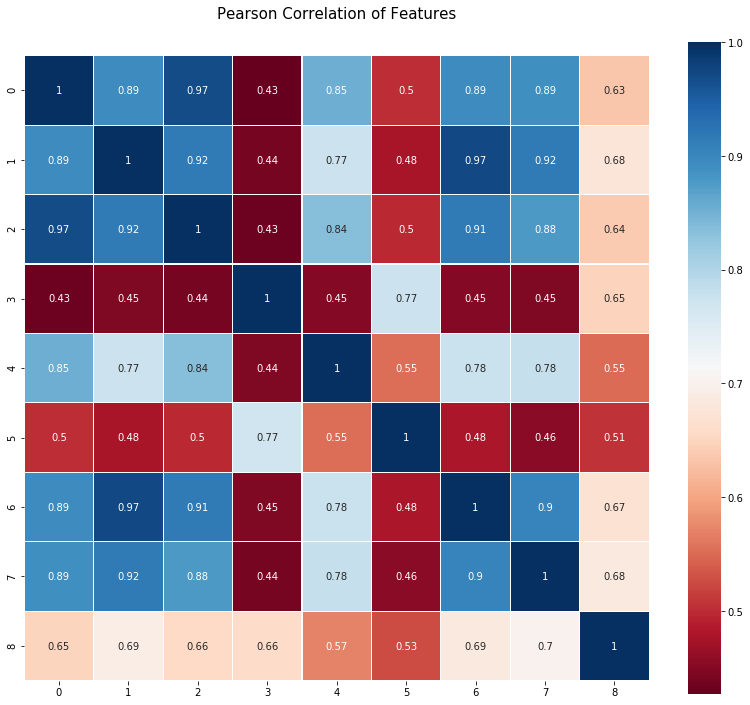

In [5]:
import seaborn as sns
%matplotlib inline
def ShowCorrHeatMap(data_pd,method = 'pearson'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(data_pd.astype(float),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()
ShowCorrHeatMap(data_sanya_gra)

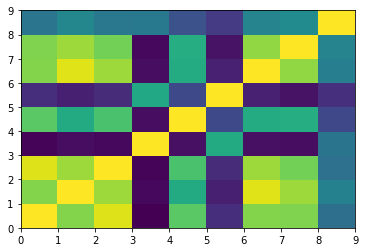

In [7]:
import matplotlib.pyplot as plt
#visualize correlations using heatmap
plt.pcolor(data_sanya_gra)
plt.show()